# **Convergence Study**

Consider a domain $\Omega = [0,1] \times [0,1]$, a space $V \subset H^1_0(\Omega)$ and the following weak problem:
$$ a(u,v) = F(v) \quad \forall v \in V, $$
where
$$
a(v,w) = \int_{\Omega} \nabla v \cdot \nabla w \textrm{ d}\mathbf{x},
$$
and
$$
F(w) = \int_{\Omega} f w \textrm{ d}\mathbf{x}.
$$
Next, given the grid $\mathcal{T}_h$, a discrete linear finite element space $V_h$ we denote with $u_h$ the finite element solution of the discrete problem:
$$
a(u_h,v_h) = F(v_h), \quad \forall v \in V_h. 
$$
From theory, we know that the following a priori error estimate holds for linear finite elements:
$$
|| u - u_h ||_{L^2} \lesssim h^2 || u ||_{L^2}.
$$
In this code snippet, we verify the a priori error estimate.

### Import library packages

In [1]:
from PoissonSolver import mesh, problem, utils

import numpy as np
import json
import matplotlib.pyplot as plt

Consider as continuous solution $u = \sin(2 \pi x)\sin(2 \pi y)$ and as source term $f = 8\pi^2 \sin(2 \pi x) \sin(2\pi y)$. 
Read them from the data.json file


In [2]:
# read input
filePath = "data.json"
with open(filePath, 'r') as file:
   data = json.load(file)

In [3]:
# generate mesh
grid = mesh.Mesh(data)

In [4]:
# employ custom utility to read the forcing and the solution from the data.json file
f = utils.parseFunction(data['source'])
g = utils.parseFunction(data['exact'])

In [5]:
# declare list to collect h refinement and L^2 error result
hList = []
normL2list = []

In [6]:
# We now loop and refine the solution computing at each iteration the L^2 error
for i in range(0,5):
    # start with a finer refinement
    grid.refine()   
    
    # assemble the problem
    pb = problem.Problem(grid, data)
    
    # assemble matrix stiff
    pb.stiff(grid)
    
    # assemble source term
    pb.source(grid, f)
    
    # impose dirichlet bc with lifting
    pb.lifting(grid, g)
    
    # solve the algebric problem
    uh = pb.solveLifting()
    
    # compute the L^2 norm
    normL2 = utils.l2Norm(grid, uh)
    hList.append(grid.h())
    normL2list.append(normL2)

Denote with $e_i = u - u_{h,i}$, where $u_{h,i}$ is the solution obtained with the $i$th refinement.
Next, if we take the $\log$ of the above a priori error estimate, we have that:
$$ \log( e_i ) \approx 2 \log(h_i).
$$
Hence, the $L^2$ error in the $\log\log$ plot is parallel to $2 \log(h_i)$.

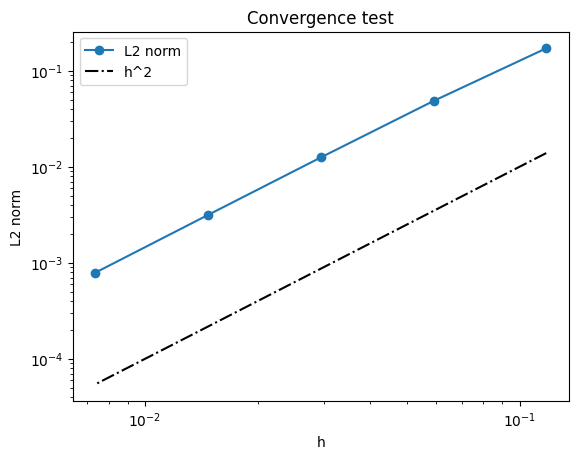

In [7]:
plt.figure()
plt.loglog(hList, normL2list, '-o')
plt.loglog(hList, np.array(hList)**2, 'k-.')
plt.xlabel('h')
plt.ylabel('L2 norm')
plt.title('Convergence test')
plt.legend(['L2 norm', 'h^2'])
plt.show()